In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

In [2]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1 = 0.0104               # m/s 
    A2 = 0.002290              # m/s
    g1 = 2.99
    g2 = 0.001
    kb = 0.004142                         # m3/sec
    b = 0.001
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=2.5*10**-7                     # m3/sec 
        
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,800)
num_points_0=800
initialConditions = [0, 0, 0, 0,0.6213]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration')

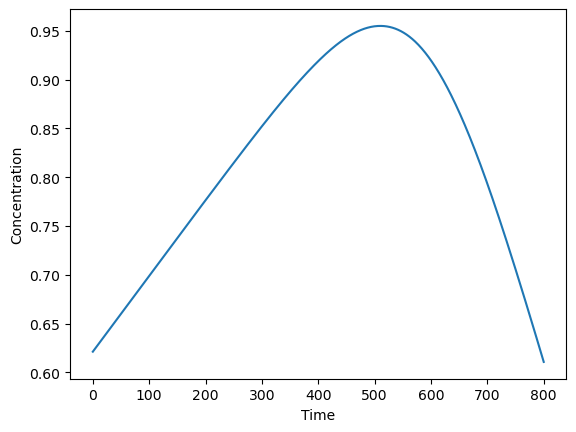

In [3]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

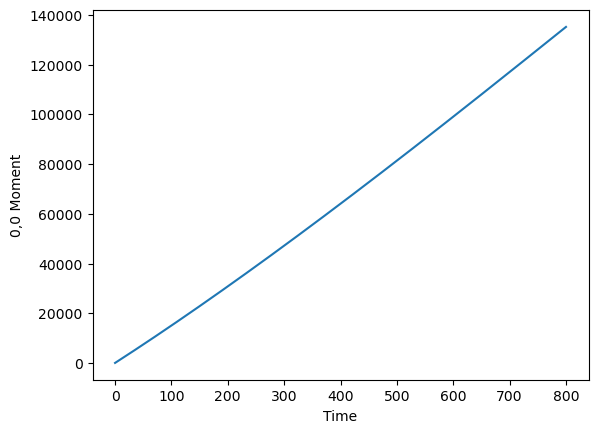

In [8]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

In [3]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=2.5*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'Concentration')

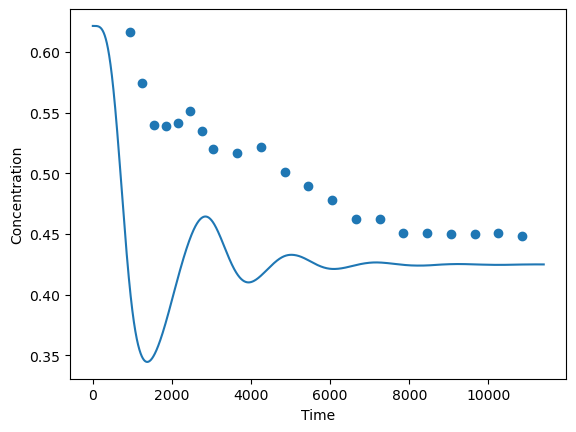

In [5]:
Time= np.array([950,1250,1550,1850,2150,2450,2750,3050,3650,4250,4850,5450,6050,6650,7250,7850,8450,9050,9650,10250,10850])
Concentration = np.array([0.6159,0.5739,0.5401,0.5389,0.5411,0.5514,0.5347,0.5203,0.5164,0.5214,0.5009,0.4891,0.4778,0.4626,0.4627,0.4505,0.4507,0.4501,0.4498,0.4511,0.4483])
plt.scatter(Time,Concentration)
plt.plot(sol1.t, sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

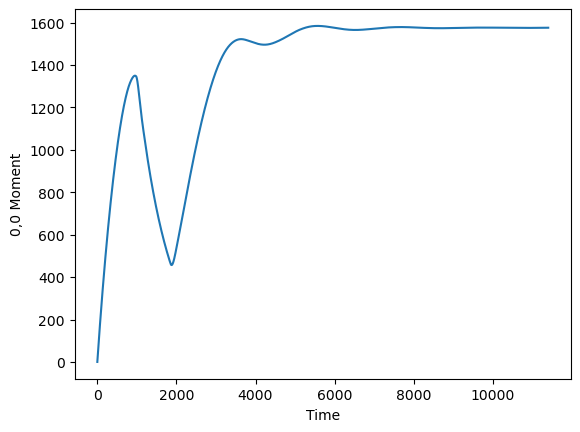

In [6]:
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, '0,0 Moment')

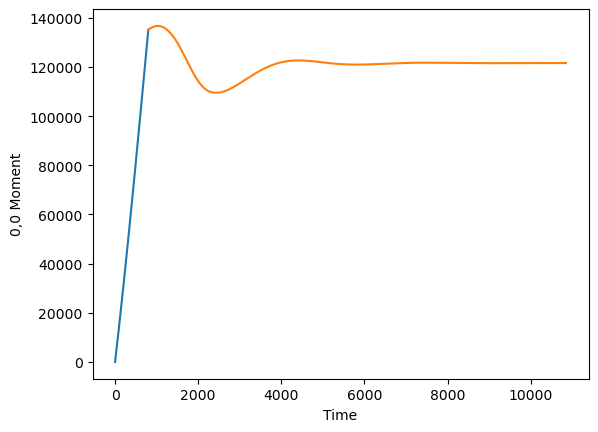

In [12]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, 'Concentration')

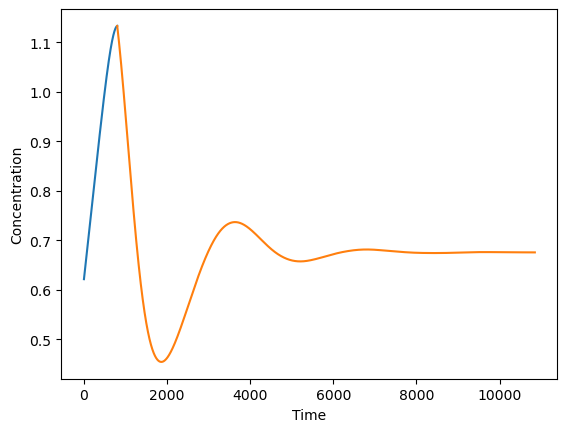

In [13]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, ' 1,0 Moment')

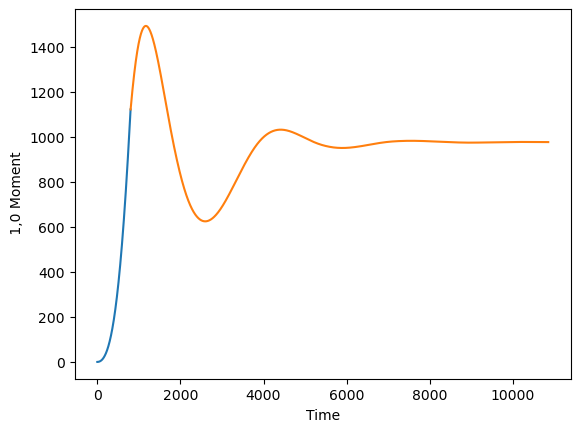

In [14]:
plt.plot(sol.t,sol.y[1])
plt.xlabel("Time")
plt.ylabel(" 1,0 Moment")
plt.plot(sol1.t,sol1.y[1])
plt.xlabel("Time")
plt.ylabel(" 1,0 Moment")

Text(0, 0.5, ' 0,1 Moment')

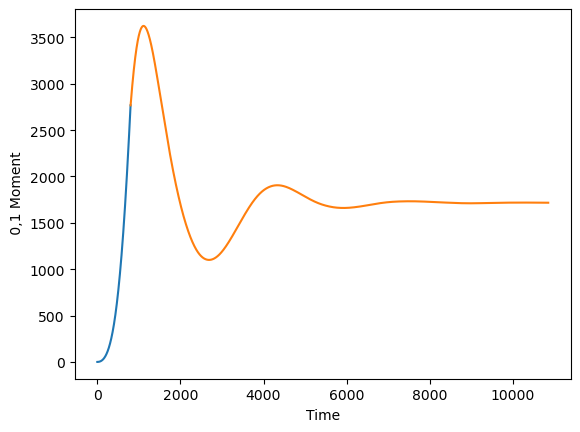

In [15]:
plt.plot(sol.t,sol.y[2])
plt.xlabel("Time")
plt.ylabel(" 0,1 Moment")
plt.plot(sol1.t,sol1.y[2])
plt.xlabel("Time")
plt.ylabel(" 0,1 Moment")

Text(0, 0.5, ' 1,1 Moment')

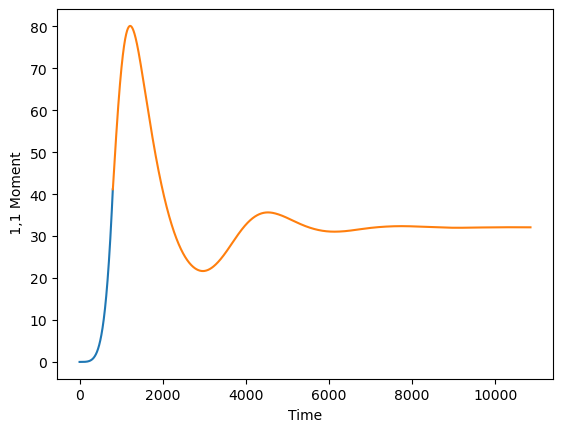

In [16]:
plt.plot(sol.t,sol.y[3])
plt.xlabel("Time")
plt.ylabel(" 1,1 Moment")
plt.plot(sol1.t,sol1.y[3])
plt.xlabel("Time")
plt.ylabel(" 1,1 Moment")

In [7]:
Time= np.array([950,1250,1550,1850,2150,2450,2750,3050,3650,4250,4850,5450,6050,6650,7250,7850,8450,9050,9650,10250,10850])
Concentration = np.array([0.6159,0.5739,0.5401,0.5389,0.5411,0.5514,0.5347,0.5203,0.5164,0.5214,0.5009,0.4891,0.4778,0.4626,0.4627,0.4505,0.4507,0.4501,0.4498,0.4511,0.4483])

In [8]:
len(Concentration)

21

Text(0, 0.5, 'Concentration')

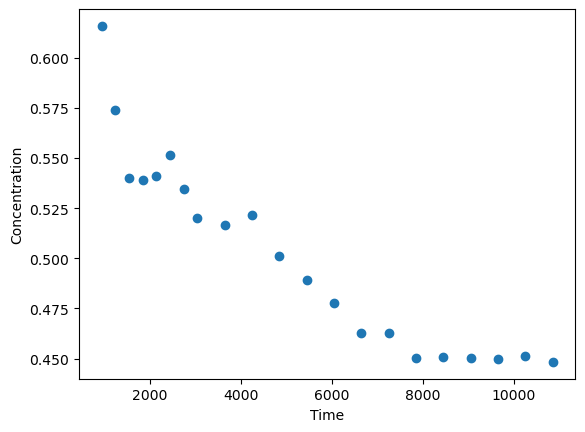

In [9]:
plt.scatter(Time,Concentration)
plt.xlabel("Time")
plt.ylabel("Concentration")

Optimized Parameters:
A1: -7.046281286404816e-05
g1: 0.7643543145875593
A2: 1.0419515346506608e-05
g2: 1.5120812692175136
kb: 161.15368652354752
b: 0.22918458105067155


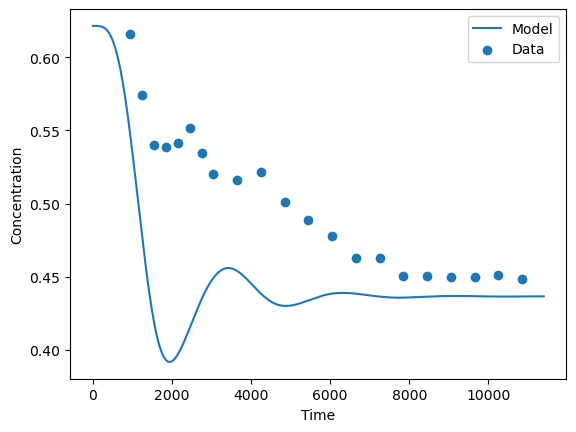

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time= np.array([950,1250,1550,1850,2150,2450,2750,3050,3650,4250,4850,5450,6050,6650,7250,7850,8450,9050,9650,10250,10850])
Concentration = np.array([0.6159,0.5739,0.5401,0.5389,0.5411,0.5514,0.5347,0.5203,0.5164,0.5214,0.5009,0.4891,0.4778,0.4626,0.4627,0.4505,0.4507,0.4501,0.4498,0.4511,0.4483])
def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4], bounds_error=False, fill_value="extrapolate")
    model_predictions = interp_solution(Time)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess = [0.00001313983, 1, 0.00002593650, 1.43, 160, 0.19]

# Minimize the objective function
result = minimize(objective, initial_guess, method='COBYLA')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

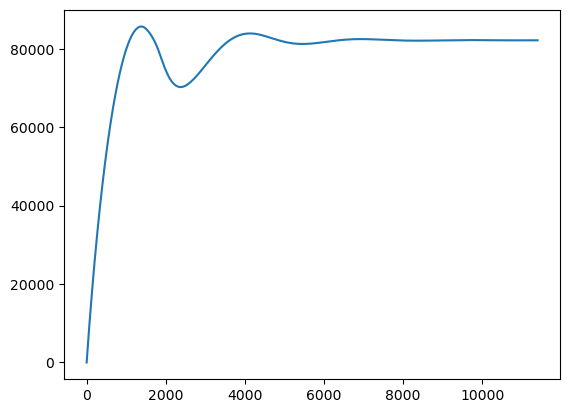

In [2]:
plt.plot(sol.t, sol.y[0], label='Model')

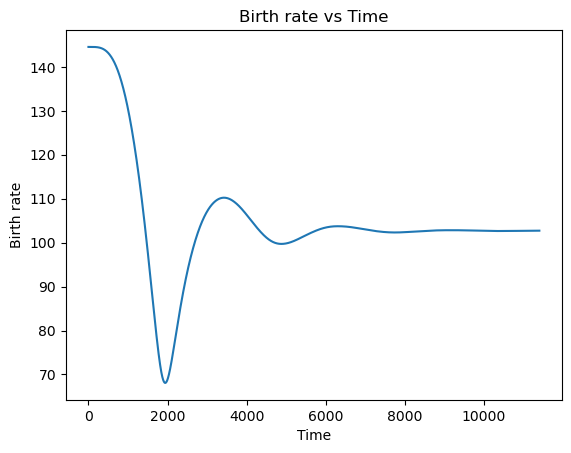

In [3]:
plt.plot(sol.t, kb_opt * ((sol.y[4] - 0.383) / 0.383)**b_opt)
plt.xlabel("Time")
plt.ylabel("Birth rate")
plt.title("Birth rate vs Time")
plt.show()

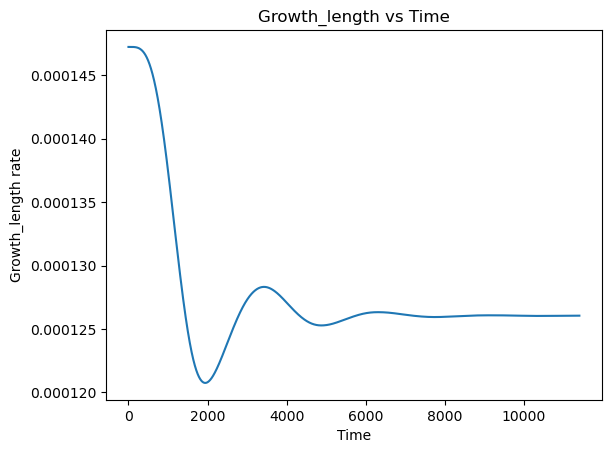

In [11]:
plt.plot(sol.t, -(A1_opt) * ((sol.y[4] + 0.383) / 0.383)**g1_opt)
plt.xlabel("Time")
plt.ylabel("Growth_length rate")
plt.title("Growth_length vs Time")
plt.show()

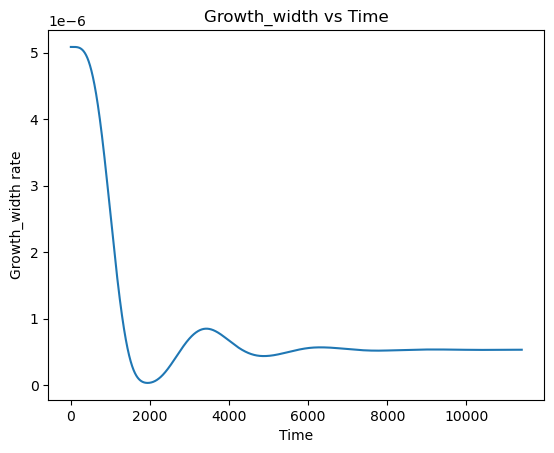

In [5]:
plt.plot(sol.t, A2_opt * ((sol.y[4] - 0.383) / 0.383)**g2_opt)
plt.xlabel("Time")
plt.ylabel("Growth_width rate")
plt.title("Growth_width vs Time")
plt.show()

In [3]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1 = -7.04*10**(-5)               # m/s 
    A2 = 1.04*10**(-5)               # m/s
    g1 = 0.76
    g2 = 1.51
    kb = 161.153                        # m3/sec
    b = 0.229183
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f= 2.5*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,800)
num_points_0=800
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

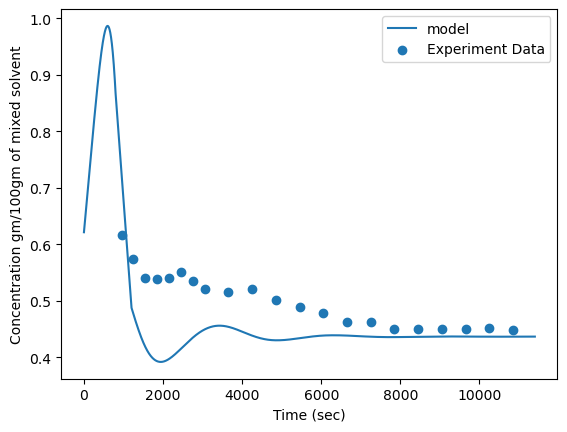

In [4]:
plt.plot(np.append(sol1.t,sol.t[1200:]),np.append(sol1.y[4], sol.y[4,1200:]), label ="model")
plt.scatter(Time, Concentration, label='Experiment Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.legend()
plt.show()

Optimized Parameters:
A1: 0.00011448468644055735
g1: 0.7708019261466721
A2: 2.075188162687438e-05
g2: 1.506854297300457
kb: 161.1666259764015
b: 0.21868652140514175


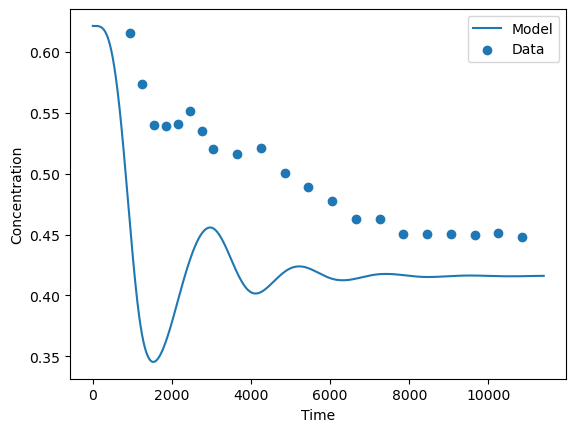

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time= np.array([950,1250,1550,1850,2150,2450,2750,3050,3650,4250,4850,5450,6050,6650,7250,7850,8450,9050,9650,10250,10850])
Concentration = np.array([0.6159,0.5739,0.5401,0.5389,0.5411,0.5514,0.5347,0.5203,0.5164,0.5214,0.5009,0.4891,0.4778,0.4626,0.4627,0.4505,0.4507,0.4501,0.4498,0.4511,0.4483])
def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4], bounds_error=False, fill_value="extrapolate")
    model_predictions = interp_solution(Time)
    # Calculate negative log-likelihood
    sigma = 0.01  # Standard deviation of the error
    nll = 0.5 * np.sum(((model_predictions - Concentration) / sigma)**2 + np.log(2 * np.pi * sigma**2))
    
    return nll

# Initial guess for parameters
initial_guess = [0.00001313983, 1, 0.00002593650, 1.43, 160, 0.19]

# Minimize the objective function
result = minimize(objective, initial_guess, method='COBYLA')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()